![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

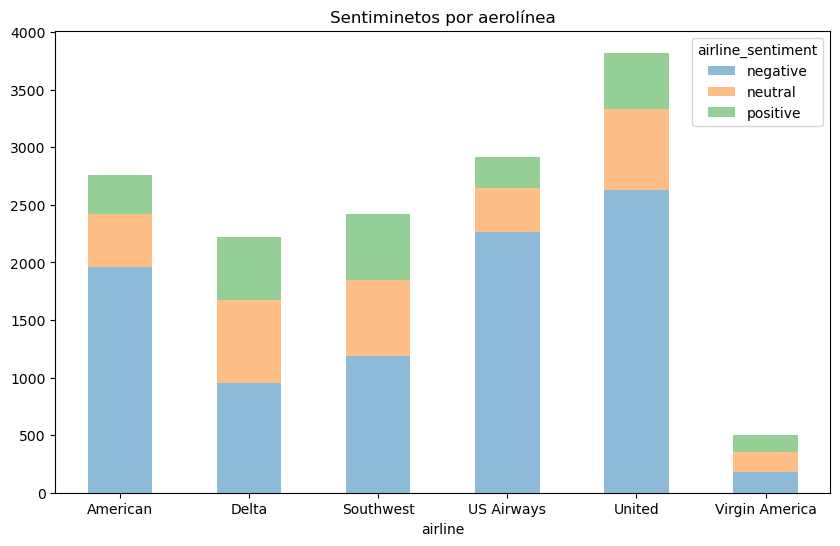

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [8]:
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 1
# Se crea el CountVectorizer y se ajusta a los conjuntos de datos de entrenamiento y prueba
vect_C = CountVectorizer(lowercase=False)

X_train_dtm_C = vect_C.fit_transform(X_train)
X_test_dtm_C = vect_C.transform(X_test)

In [12]:
# Se entrena un modelo de clasificación Random Forest, se ajusta a los datos de entrenamiento y se realizan las predicciones sobre el conjunto de prueba

regRF = RandomForestClassifier(random_state=0)
regRF.fit(X_train_dtm_C, y_train)
y_pred_regRF = regRF.predict(X_test_dtm_C)

In [13]:
# Calculo del accuracy para medir el desempeño del modelo
accuracy_regRFCV = accuracy_score(y_test, y_pred_regRF)
print("Accuracy del modelo Random Forest con Count Vectorizer sin calibrar:")
print(accuracy_regRFCV)

Accuracy del modelo Random Forest con Count Vectorizer sin calibrar:
0.7649006622516556


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 2
# Se crea el CountVectorizer sin stop words y se ajusta a los conjuntos de datos de entrenamiento y prueba
vect_SW = CountVectorizer(lowercase=False, stop_words='english')

X_train_dtm_SW = vect_SW.fit_transform(X_train)
X_test_dtm_SW = vect_SW.transform(X_test)

In [15]:
# Se entrena un modelo de clasificación Random Forest, se ajusta a los datos de entrenamiento y se realizan las predicciones sobre el conjunto de prueba

rf_SW = RandomForestClassifier(random_state=0)
rf_SW.fit(X_train_dtm_SW, y_train)
y_pred_SW = rf_SW.predict(X_test_dtm_SW)

In [16]:
# Calculo del accuracy para medir el desempeño del modelo

accuracy_regRFSW = accuracy_score(y_test, y_pred_SW)
print("Accuracy del modelo Random Forest con Count Vectorizer sin stop words:")
print(accuracy_regRFSW)

Accuracy del modelo Random Forest con Count Vectorizer sin stop words:
0.7613824503311258


### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [17]:
# Celda 3
# Se crea una función que recibe un parametro texto y devuelve una lista de lemas 
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_with_verbs(text):
    words = text.split()
    return [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

In [18]:
# Se crea una instancia de CountVectorizer el cual usa la función de lematizacion de verbos y se ajusta a los conjuntos de datos de entrenamiento y prueba
vect_LM = CountVectorizer(lowercase=False, analyzer=lemmatize_with_verbs)

X_train_dtm_LM = vect_LM.fit_transform(X_train)
X_test_dtm_LM = vect_LM.transform(X_test)

In [19]:
# Se entrena un modelo de clasificación Random Forest, se ajusta a los datos de entrenamiento y se realizan las predicciones sobre el conjunto de prueba
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_dtm_LM, y_train)

y_pred_LM = rf_model.predict(X_test_dtm_LM)

In [20]:
# Calcular el accuracy del modelo en el set de pruebas
accuracy_regRFLM = accuracy_score(y_test, y_pred_LM)

print("Accuracy del modelo Random Forest con countVectorizer en lematizacion:")
print(accuracy_regRFLM)

Accuracy del modelo Random Forest con countVectorizer en lematizacion:
0.7524834437086093


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [21]:
# Celda 4
# Se crea instancia de countVectorizer el cual usa los metodos de lematizacion de verbos y stop words en ingles
vect_MT = CountVectorizer(lowercase=False, analyzer=lemmatize_with_verbs, stop_words='english')
 
X_train_dtm_MT = vect_MT.fit_transform(X_train)
X_test_dtm_MT = vect_MT.transform(X_test)

In [22]:
# Se entrena un modelo de clasificación Random Forest, se ajusta a los datos de entrenamiento y se realizan las predicciones sobre el conjunto de prueba
rf_MT = RandomForestClassifier(random_state=0)

# Entrenar modelo con los datos de entrenamiento
rf_MT.fit(X_train_dtm_MT, y_train)

# Predecir los valores para el set de pruebas transformado
y_pred_MT = rf_MT.predict(X_test_dtm_MT)

In [23]:
# Calcular el accuracy del modelo en el set de pruebas
accuracy_regRFMT = accuracy_score(y_test, y_pred_MT)

print("Accuracy del modelo Random Forest con countVectorizer en multiples tecnicas:")
print(accuracy_regRFMT)

Accuracy del modelo Random Forest con countVectorizer en multiples tecnicas:
0.7524834437086093


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

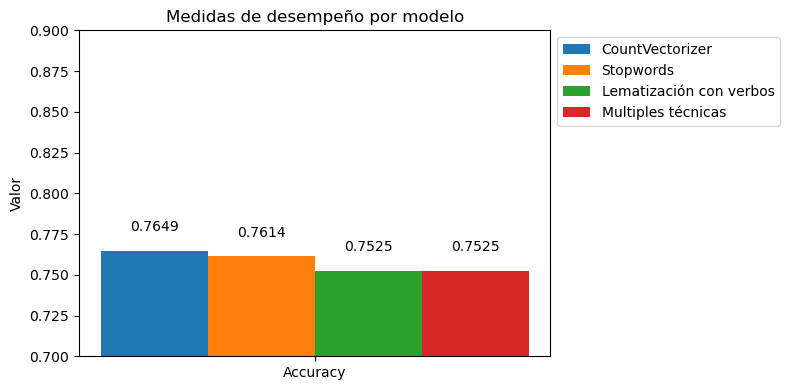

In [24]:
# Celda 5

# Comparar las evaluaciones de poder predictivo de los diferentes modelos
medidas = ['Accuracy']
modelos = {
    'CountVectorizer': [accuracy_regRFCV],
    'Stopwords': [accuracy_regRFSW],
    'Lematización con verbos': [accuracy_regRFLM],
    'Multiples técnicas': [accuracy_regRFMT],
}

# Formato de colores para las barras
colores_modelos = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Configuración de las dimensiones de figura
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.01
index = np.arange(len(medidas))

# Graficamos las barras con el valor obtenido en cada modelo para las medidas
for i, (nombre_modelo, valores) in enumerate(modelos.items()):
    etiquetas = [f'{round(valor, 4):.4f}' for valor in valores]  # Redondear valores y convertir a cadena
    ax.bar(index + i * bar_width, valores, bar_width, label=nombre_modelo, color=colores_modelos[i % len(colores_modelos)])
    for j, etiqueta in enumerate(etiquetas):
        ax.text(index[j] + i * bar_width, valores[j] + 0.01, etiqueta, ha='center', va='bottom')

# Ajustes de la figura
ax.set_xlabel('')
ax.set_ylabel('Valor')
ax.set_title('Medidas de desempeño por modelo')
ax.set_xticks(index + (len(modelos) - 1) * bar_width / 2)
ax.set_xticklabels(medidas)
ax.set_ylim(0.7, 0.9)  # Establecer límite inferior en 0.8
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Como resultado se obtiene que el modelo Random Forest que mejor desempeño obtuvo en cuanto al accuracy es aquel que no presenta ningún tipo de preprocecamiento, con un resultado de 0.764. Lo que nos indica que aproximadamente el 76% de las predicciones etiquetas de sentimientos fueron correctas.

El modelo que contempla la eliminación de Stop Words, presenta un un accuracy ligeramente inferior. Aunque la diferencia en accuracy es mínima en comparación con el modelo anterior, la eliminación de estas palabras puede ayudar a mejorar la generalización del modelo al reducir el ruido en los datos de entrada.

Posteriormente al entrenar un nuevo modelo que contiene la Lematización con verbos, obtenemos otra ligera disnimución en el accuracy. Esto indica que para el caso en estudio, este tipo de lematización específica puede no haber contribuido significativamente a mejorar la capacidad predictiva del modelo.

Por último, al combinar la lematización con verbos y la eliminación de stopwords, junto con el uso de CountVectorizer, obtenemos el mismo resultado que el modelo que solo contiene la lematización. Esto sugiere que, para este caso específico, la eliminación de stop words no contribuye a la mejora de la precisión del modelo si se esta usando una técnica de lematización con verbos.

Un accuracy alto en este contexto significa que el modelo de clasificación de sentimientos en los tweets tiene una alta capacidad para predecir correctamente el sentimiento de los tweets y clasificarlos. Teniendo en cuenta que el accuracy es una métrica que mide la proporción de predicciones correctas sobre el total de predicciones realizadas, un valor mas alto indica que el modelo está acertando en el sentimiento expresado en los tweets dado el contenido del mismo.